In [1]:
import pandas as pd
import pyBigWig
import actc_seq
import tqdm
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from collections import Counter
from pylab import rcParams

# import combined dataset

In [2]:
atac_out = '../../Data/ATACseq/'
chrtest_HCT116 = pd.read_csv(atac_out + 'ATAC_HCT116.csv')
chrtest_HCT116 = chrtest_HCT116[abs(chrtest_HCT116['sgRNA \'Cut\' Site TSS Offset']) <= 5000]

ess_noness = pd.read_csv('../../Data/PrimaryLibrary/design/essentials_nonessentials_CRISPRi_tiling_designs_v2.csv')
EssGene = ess_noness[ess_noness.Category == 'Essential']['Target Gene Symbol'].unique()


In [3]:
# make a dict of possible datasaets
DataSet = chrtest_HCT116.DataSet.unique()
Domain = chrtest_HCT116.Domain.unique()
Cellline = chrtest_HCT116.condition.unique()
from itertools import product
DatasetCombo = list(product(DataSet,Domain,Cellline))
def DatasetDictFunction(ATACdf):
    DatasetDict = dict()
    for combo in DatasetCombo:
        subset_data = ATACdf[(ATACdf.DataSet == combo[0]) 
                     & (ATACdf.Domain == combo[1]) 
                     & (ATACdf.condition == combo[2])]
        if len(subset_data) == 0:
            pass
        else:
            if combo[0] == 'InHouse':
                subset_data_ess = subset_data[subset_data['Target Gene Symbol'].isin(EssGene)]
                DatasetDict[combo] = subset_data_ess

            else:
                DatasetDict[combo] = subset_data
    return DatasetDict

In [4]:
DatasetDictHCT116 = DatasetDictFunction(chrtest_HCT116)

# ATAC HCT116

### Pval_ATAC_InHouseA549Kox1

ATIC: Sample size in overlap or nonoverlap < 10
CEBPE: Sample size in overlap or nonoverlap < 10
KDSR: Sample size in overlap or nonoverlap < 10


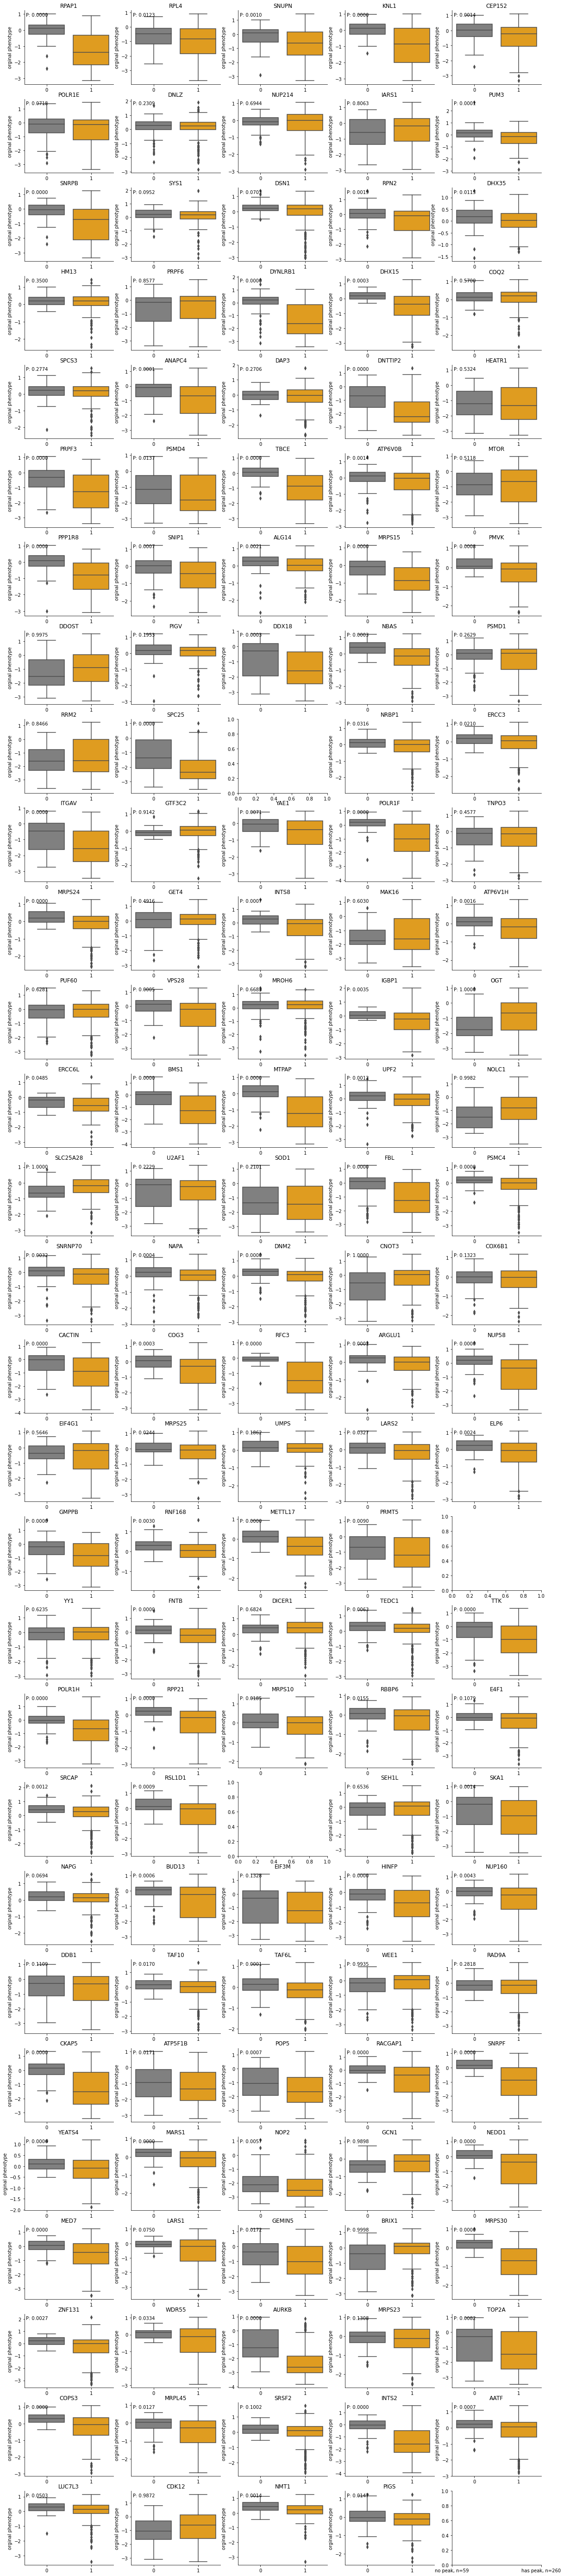

In [5]:
Pval_ATACHCT116_InHouseA549Kox1 = actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictHCT116[('InHouse', 'Kox1', 'A549')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'no peak > peak' )


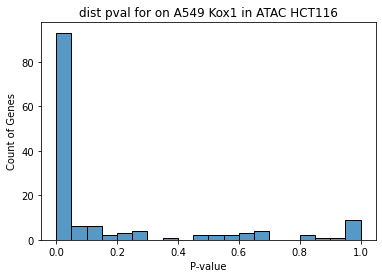

In [6]:
Pval_ATACHCT116_InHouseA549Kox1_df = pd.DataFrame(Pval_ATACHCT116_InHouseA549Kox1.items())
Pval_ATACHCT116_InHouseA549Kox1_df['cell'] = 'InHouseA549Kox1'
actc_seq.pval_agg(Pval_ATACHCT116_InHouseA549Kox1_df[1], 'dist pval for on A549 Kox1 in ATAC HCT116')

### ATAC_InHouseA549Zim3

ATIC: Sample size in overlap or nonoverlap < 10
CEBPE: Sample size in overlap or nonoverlap < 10
KDSR: Sample size in overlap or nonoverlap < 10


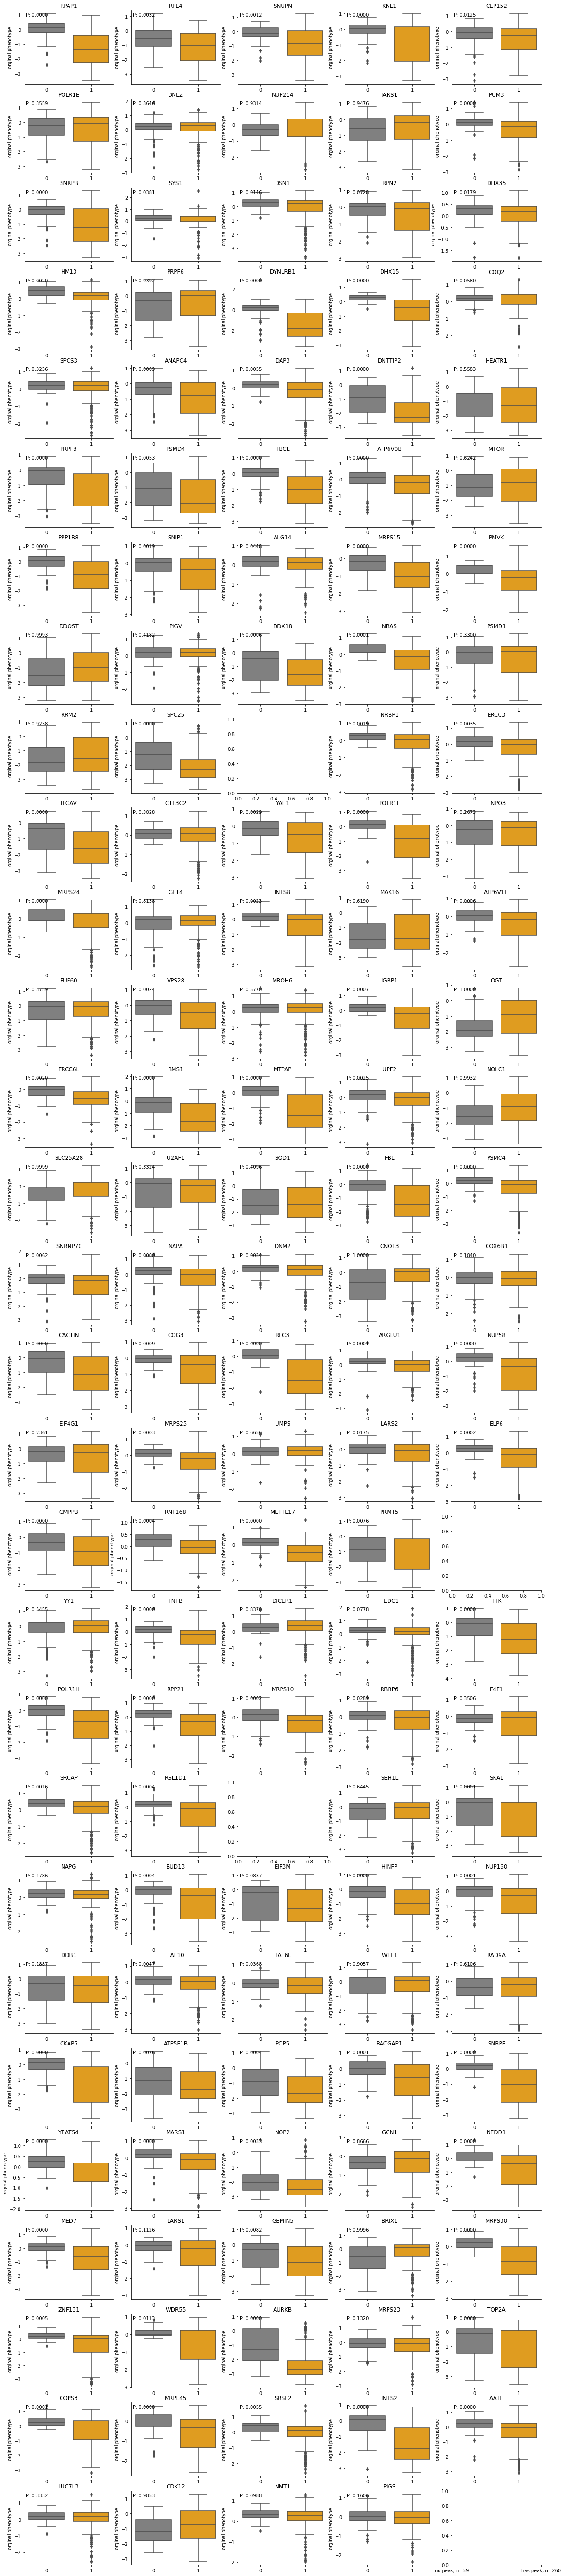

In [7]:
Pval_ATACHCT116_InHouseA549Zim3= actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictHCT116[('InHouse', 'Zim3', 'A549')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'no peak > peak' )


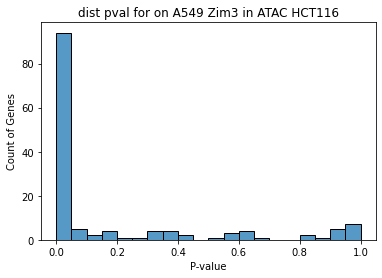

In [8]:
Pval_ATACHCT116_InHouseA549Zim3_df = pd.DataFrame(Pval_ATACHCT116_InHouseA549Zim3.items())
Pval_ATACHCT116_InHouseA549Zim3_df['cell'] = 'InHouseA549Zim3'
actc_seq.pval_agg(Pval_ATACHCT116_InHouseA549Zim3_df[1], 'dist pval for on A549 Zim3 in ATAC HCT116')

### InHouseHCT116Zim3

ATIC: Sample size in overlap or nonoverlap < 10
CEBPE: Sample size in overlap or nonoverlap < 10
KDSR: Sample size in overlap or nonoverlap < 10


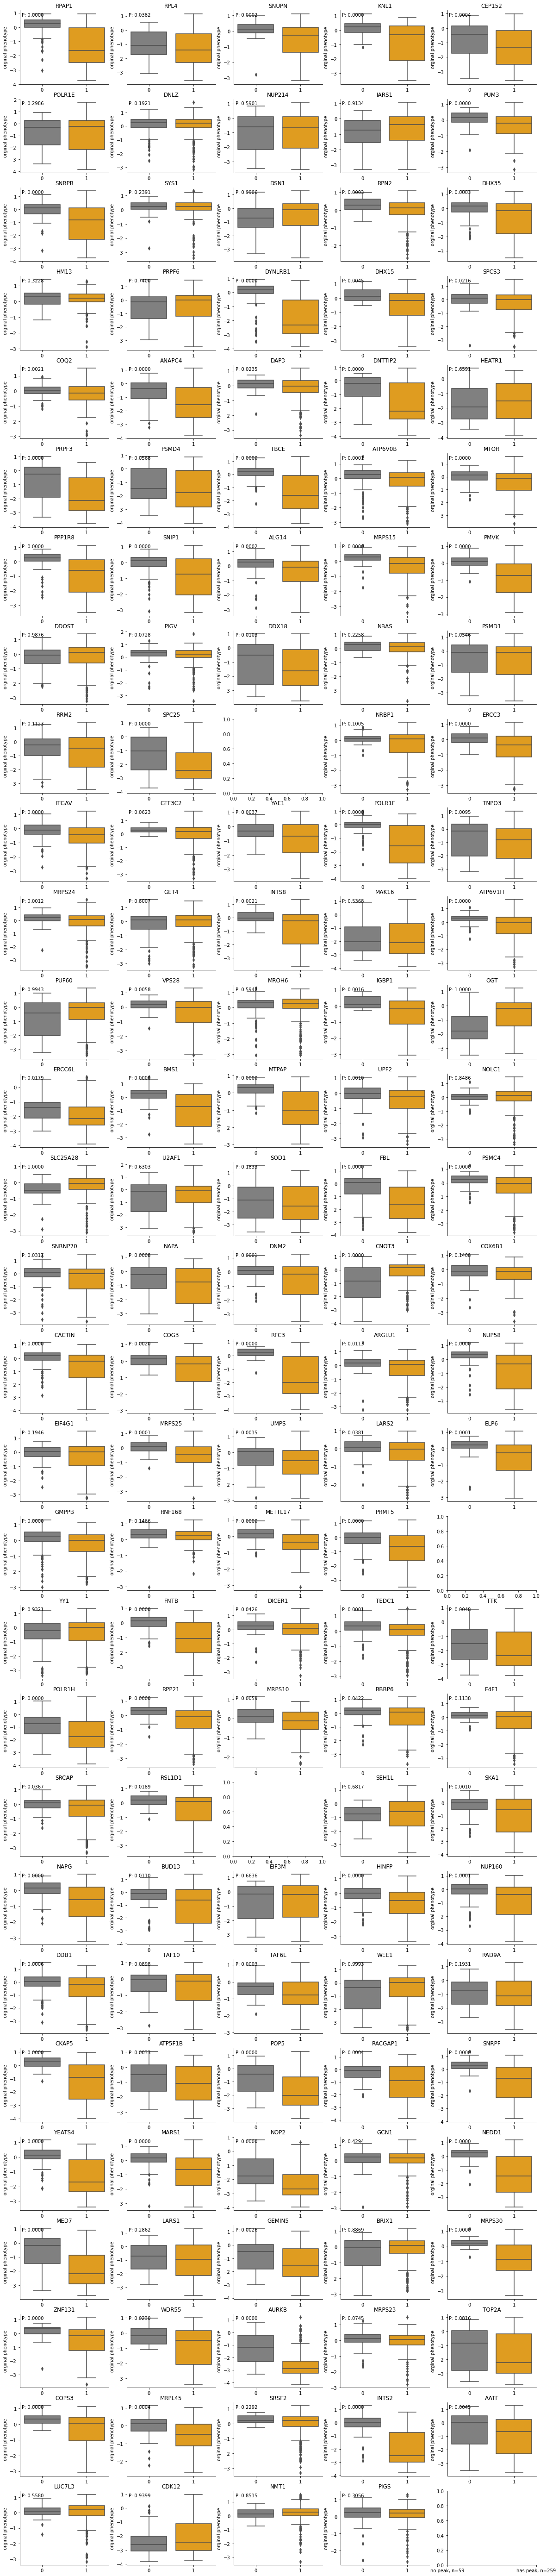

In [9]:
Pval_ATACHCT116_InHouseHCT116Zim3= actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictHCT116[('InHouse', 'Zim3', 'HCT116')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'no peak > peak' )


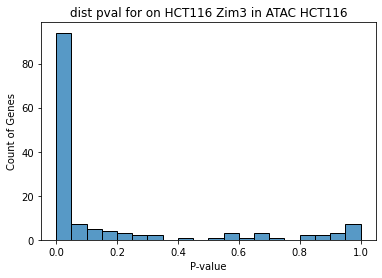

In [10]:
Pval_ATACHCT116_InHouseHCT116Zim3_df = pd.DataFrame(Pval_ATACHCT116_InHouseHCT116Zim3.items())
Pval_ATACHCT116_InHouseHCT116Zim3_df['cell'] = 'InHouseHCT116Zim3'
actc_seq.pval_agg(Pval_ATACHCT116_InHouseHCT116Zim3_df[1], 'dist pval for on HCT116 Zim3 in ATAC HCT116')

### InHouseHCT116Kox1

ATIC: Sample size in overlap or nonoverlap < 10
CEBPE: Sample size in overlap or nonoverlap < 10
KDSR: Sample size in overlap or nonoverlap < 10


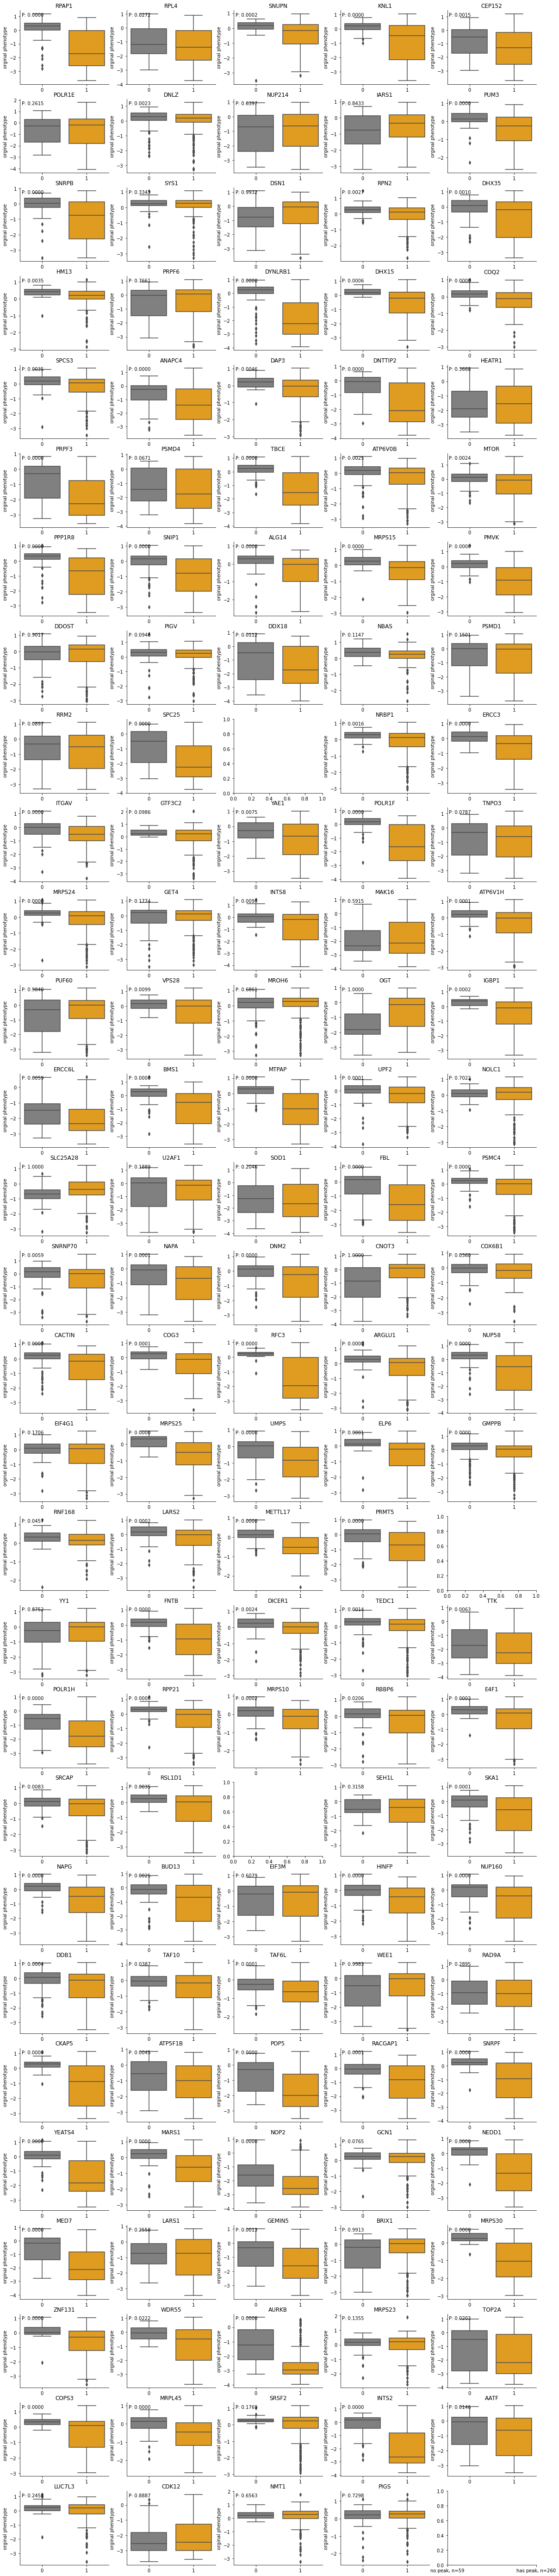

In [11]:
Pval_ATACHCT116_InHouseHCT116Kox1 = actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictHCT116[('InHouse', 'Kox1', 'HCT116')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'no peak > peak' )


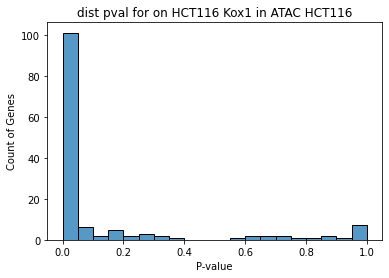

In [12]:
Pval_ATACHCT116_InHouseHCT116Kox1_df = pd.DataFrame(Pval_ATACHCT116_InHouseHCT116Kox1.items())
Pval_ATACHCT116_InHouseHCT116Kox1_df['cell'] = 'InHouseHCT116Kox1'
actc_seq.pval_agg(Pval_ATACHCT116_InHouseHCT116Kox1_df[1], 'dist pval for on HCT116 Kox1 in ATAC HCT116')

### NunezK562Kox1

LEO1: Sample size in overlap or nonoverlap < 10
FDPS: Sample size in overlap or nonoverlap < 10
MRPL35: Sample size in overlap or nonoverlap < 10
DDX21: Sample size in overlap or nonoverlap < 10
DBR1: Sample size in overlap or nonoverlap < 10
SNW1: Sample size in overlap or nonoverlap < 10
NIP7: Sample size in overlap or nonoverlap < 10
MRPS35: Sample size in overlap or nonoverlap < 10
SNRNP35: Sample size in overlap or nonoverlap < 10
RARS1: Sample size in overlap or nonoverlap < 10
NLE1: Sample size in overlap or nonoverlap < 10


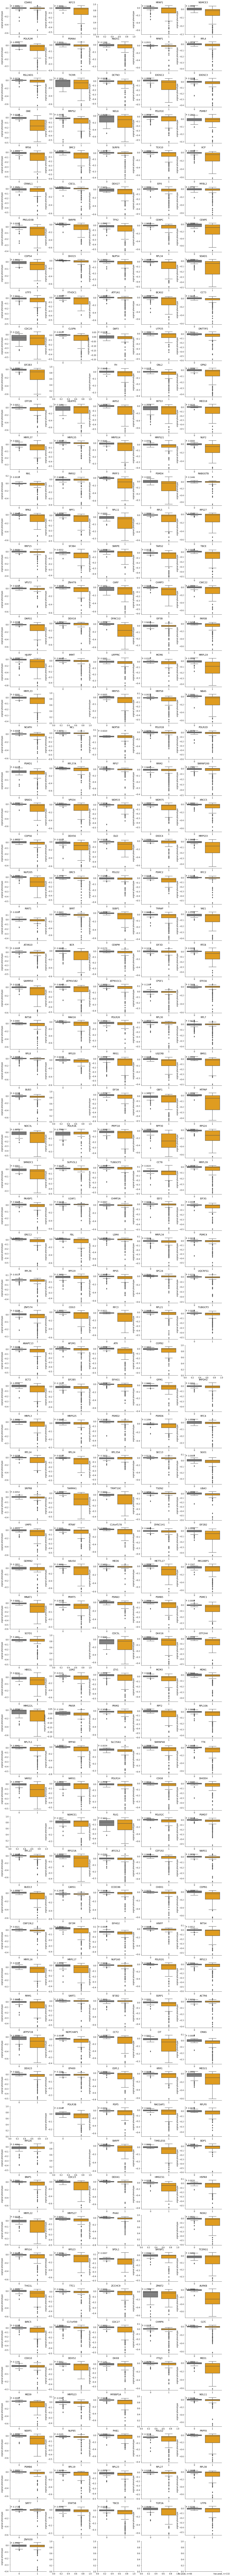

In [13]:
Pval_ATACHCT116_NunezK562Kox1 = actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictHCT116[('Nunze', 'Kox1', 'K562')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'no peak > peak' )


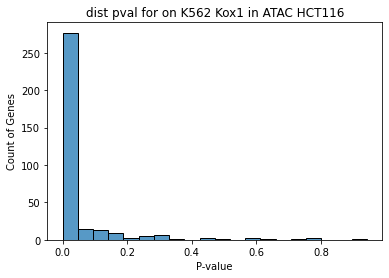

In [14]:
Pval_ATACHCT116_NunezK562Kox1_df = pd.DataFrame(Pval_ATACHCT116_NunezK562Kox1.items())
Pval_ATACHCT116_NunezK562Kox1_df['cell'] = 'NunezK562Kox1'
actc_seq.pval_agg(Pval_ATACHCT116_NunezK562Kox1_df[1], 'dist pval for on K562 Kox1 in ATAC HCT116')

### GilbertK562Kox1

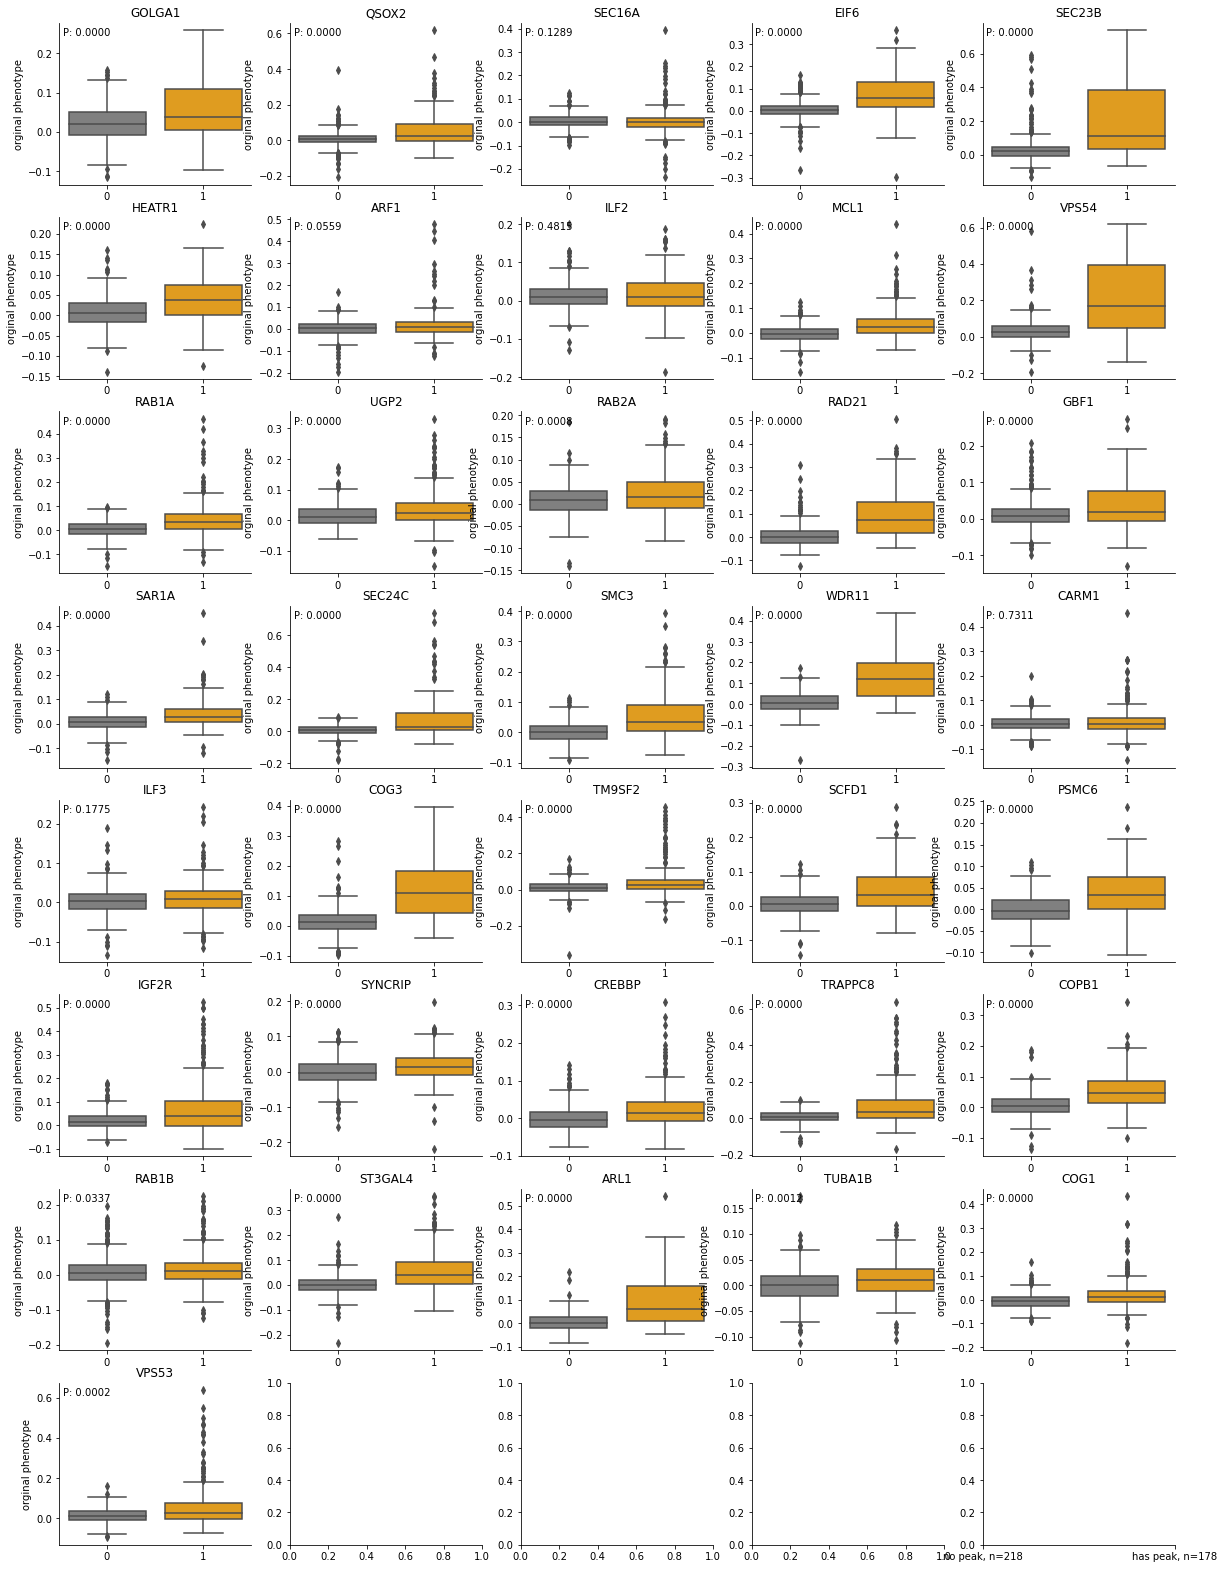

In [15]:
Pval_ATACHCT116_GilbertK562Kox1 = actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictHCT116[('Gilbert', 'Kox1', 'K562')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'two-sided' )


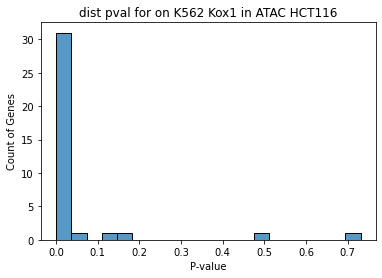

In [16]:
Pval_ATACHCT116_GilbertK562Kox1_df = pd.DataFrame(Pval_ATACHCT116_GilbertK562Kox1.items())
Pval_ATACHCT116_GilbertK562Kox1_df['cell'] = 'GilbertK562Kox1'
actc_seq.pval_agg(Pval_ATACHCT116_GilbertK562Kox1_df[1], 'dist pval for on K562 Kox1 in ATAC HCT116')

In [17]:
total_pval = pd.concat([Pval_ATACHCT116_InHouseA549Kox1_df,
           Pval_ATACHCT116_InHouseHCT116Kox1_df,
           Pval_ATACHCT116_InHouseA549Zim3_df,
           Pval_ATACHCT116_InHouseHCT116Zim3_df,
           Pval_ATACHCT116_GilbertK562Kox1_df,
           Pval_ATACHCT116_NunezK562Kox1_df])

total_pval.columns = ['Gene', 'Pval', 'DataSetID']
total_pval